# Day 7 : Linear Algebra in Machine Learning

**Linear Algebra Applications:**<br>
**Perform data preprocessing** (handle missing values, normalize, standardize).
Apply linear algebra concepts, including:
**Vector and matrix operations** (addition, multiplication, transposition, inversion).
**Dot products** (measuring similarity between stock price movements).
**Eigenvalues and eigenvectors** (dimensionality reduction techniques).
***<br>
Dimensionality reduction is the process of reducing the number of features (or dimensions) in a dataset while retaining as much information as possible.*** <br>
**Singular Value Decomposition (SVD) and Principal Component Analysis (PCA)** for feature extraction.
Visualize key insights using **Matplotlib/Seaborn**.
Save the cleaned dataset for further use.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from numpy.linalg import eig, svd

In [3]:
#Load the dataset
df = pd.read_csv("full_non_padding.csv")
df

,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,AMGN,...,VOD,VRSK,VRTX,WBA,WDC,WFM,XLNX,YHOO,XRAY,NDX
0,35.9800,96.8000,97.80,61.15,95.4000,58.180,58.000,127.040,26.680,165.8100,...,31.1701,85.440,95.270,81.365,52.1600,33.950,48.61,38.010,62.4800,NaN
1,35.9310,96.8900,97.80,61.61,95.4115,58.190,58.120,126.060,26.730,165.9101,...,31.1900,NaN,94.170,81.540,52.1500,34.100,48.74,38.140,62.8100,4665.0540
2,35.9044,96.9500,97.57,61.98,95.5100,NaN,57.950,126.510,26.712,166.1800,...,31.2100,85.730,94.749,81.530,52.2700,34.010,48.99,38.150,62.6699,4665.8260
3,35.8900,96.9700,97.55,62.09,95.5200,NaN,57.960,126.280,26.740,166.1480,...,31.2100,NaN,94.310,81.710,52.3000,33.960,48.95,38.195,62.5000,4667.0810
4,36.0080,96.9600,97.73,61.89,95.5300,58.230,58.210,126.585,26.720,165.9900,...,31.1800,85.400,94.155,81.720,52.3000,34.170,48.89,38.320,NaN,4664.4910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74496,42.6200,143.7465,133.85,76.15,104.5850,90.110,60.920,127.850,40.660,163.3200,...,26.2000,82.825,118.370,86.530,89.0400,36.355,63.12,48.200,63.2900,5585.7429
74497,42.6300,143.7350,133.84,76.15,104.5900,90.105,60.950,127.950,40.655,163.3450,...,26.2100,82.830,118.425,86.565,89.0300,36.365,63.12,48.205,63.3000,5586.3104
74498,42.6300,143.6865,133.83,76.17,104.5700,90.110,60.940,127.900,40.650,163.3800,...,26.2150,82.820,118.430,86.580,88.9992,36.370,63.13,48.200,63.2700,5585.9941
74499,42.6200,143.7350,133.83,76.16,104.5000,90.130,60.945,127.935,40.645,163.3800,...,26.1950,82.820,118.430,86.580,89.0400,36.365,63.14,48.205,63.2700,5585.6408


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74501 entries, 0 to 74500
Columns: 105 entries, AAL to NDX
dtypes: float64(105)
memory usage: 59.7 MB


In [15]:
print(f"Rows: {df.shape[0]}\nColumns: {df.shape[1]}")

Rows: 74501
Columns: 105


In [6]:
df.dtypes

AAL     float64
AAPL    float64
ADBE    float64
ADI     float64
ADP     float64
         ...   
WFM     float64
XLNX    float64
YHOO    float64
XRAY    float64
NDX     float64
Length: 105, dtype: object

In [13]:
print(f"Missing Values:", df.isnull().sum().sum())

Missing Values: 224421


In [16]:
#fill the missing values
df.fillna(df.median(), inplace=True)

In [17]:
print(f"Missing Values:", df.isnull().sum().sum())

Missing Values: 0


In [18]:
#Convert DataFrame to Numpy Arrays
data = df.values

In [19]:
data

array([[  35.98  ,   96.8   ,   97.8   , ...,   38.01  ,   62.48  ,
        4893.375 ],
       [  35.931 ,   96.89  ,   97.8   , ...,   38.14  ,   62.81  ,
        4665.054 ],
       [  35.9044,   96.95  ,   97.57  , ...,   38.15  ,   62.6699,
        4665.826 ],
       ...,
       [  42.63  ,  143.6865,  133.83  , ...,   48.2   ,   63.27  ,
        5585.9941],
       [  42.62  ,  143.735 ,  133.83  , ...,   48.205 ,   63.27  ,
        5585.6408],
       [  42.62  ,  143.65  ,  133.74  , ...,   48.21  ,   63.24  ,
        5583.813 ]], shape=(74501, 105))

In [20]:
#Vector Operations
vector_1 = data[0, :]
vector_2 = data[1,:]
dot_product = np.dot(vector_1, vector_2)
print(f"Dot Product: {dot_product}")

Dot Product: 27492749.830310997


In [23]:
#Matrix Operations
matrix = np.array(data[:10, :10])
matrix_transpose = matrix.T
matrix_inverse = np.linalg.pinv(matrix)
print(f"Matrix Transpose:\n, {matrix_transpose}")

Matrix Transpose:
, [[ 35.98    35.931   35.9044  35.89    36.008   36.1     36.0922  36.05
   36.05    36.12  ]
 [ 96.8     96.89    96.95    96.97    96.96    97.045   97.095   97.145
   97.23    97.3   ]
 [ 97.8     97.8     97.57    97.55    97.73    97.88    97.93    97.94
   98.      98.015 ]
 [ 61.15    61.61    61.98    62.09    61.89    62.09    62.07    62.04
   61.99    61.77  ]
 [ 95.4     95.4115  95.51    95.52    95.53    95.75    95.75    95.73
   95.69    95.79  ]
 [ 58.18    58.19    75.69    75.69    58.23    75.69    58.22    58.25
   58.25    75.69  ]
 [ 58.      58.12    57.95    57.96    58.21    58.22    58.35    58.34
   58.37    58.3677]
 [127.04   126.06   126.51   126.28   126.585  126.04   126.4    126.41
  126.96   126.74  ]
 [ 26.68    26.73    26.712   26.74    26.72    26.735   26.7     26.715
   26.7     26.64  ]
 [165.81   165.9101 166.18   166.148  165.99   166.29   165.93   166.315
  166.169  166.25  ]]


In [28]:
#Eigenvalues and Eigenvectors
cov_matrix = np.cov(matrix, rowvar=False)
eigenvalues, eigenvectors = eig(cov_matrix)
print(f"Eigenvalues:\n{eigenvalues[:5]}")

Eigenvalues:
[8.14245071e+01 1.46115857e-01 1.15047503e-01 3.44363832e-02
 8.39061540e-03]


In [31]:
#Singular Value Decomposition
U, S, Vt = svd(matrix)
print(f"Singular Values:\n{S[:5]}")

Singular Values:
[9.23027316e+02 2.63703418e+01 1.13171737e+00 5.64842979e-01
 4.68892220e-01]


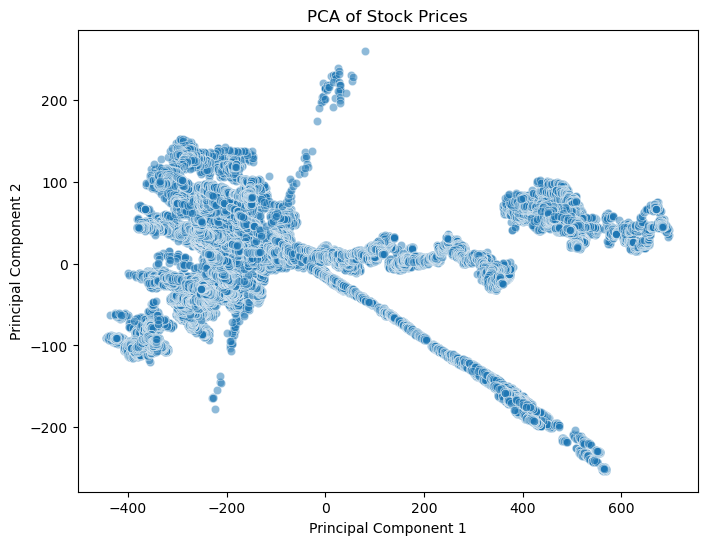

In [36]:
#PCA for Dimensionality Reduction

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)
plt.figure(figsize=(8,6))
sns.scatterplot(x=principal_components[:,0],
                y=principal_components[:,1],
                alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Stock Prices")
plt.show()

In [37]:
#Save processed dataset
df.to_csv("processed_stock_data.csv", index=False)